# Overview of Conversational Intelligence Challenge 1st Roud Dataset

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open("train_full.json") as f:
    dataset = json.load(f)

In [3]:
# dataset[50]["thread"] # print some data

## 1. Number of dialogs with more then 2 turns from each side

In [4]:
long_dialogs = 0
dialog_lens = []

for d in dataset:
    Alice = 0
    Bob = 0
    for u in d["thread"]:
        if u["userId"] == "Alice":
            Alice += 1
        elif u["userId"] == "Bob":
            Bob += 1
        else: 
            raise ValueError
    
    dialog_lens.append(Alice + Bob)
    if Alice > 2 and Bob > 2:
        long_dialogs += 1

long_dialogs

1719

## 2. Distribution of dialog lengtns measured in turns

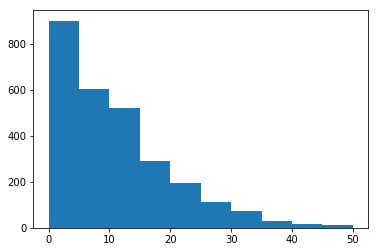

In [7]:
plot = plt.hist(dialog_lens, bins=10, range=(0,50))

In [8]:
# dataset[200] # print some data

In [9]:
human_lens = []
bot_lens = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))
        elif u["userId"] == "Bob":
            if Bob:
                human_lens.append(len(u["text"]))
            else:
                bot_lens.append(len(u["text"]))

## 3. Distribution of turn lengths in characters

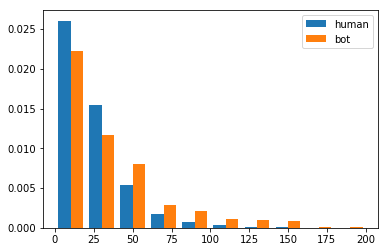

In [32]:
plot = plt.hist((human_lens,bot_lens), bins=10, normed = 1, range=(0,200), label = ('human','bot'))
l = plt.legend()

In [33]:
human_eval = []
bot_eval = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["thread"]:
        if u["userId"] == "Alice":
            if Alice:
                human_eval.append((u["evaluation"]-1))
            else:
                bot_eval.append((u["evaluation"]-1))
        elif u["userId"] == "Bob":
            if Bob:
                human_eval.append((u["evaluation"]-1))
            else:
                bot_eval.append((u["evaluation"]-1))

## 4. Distribution of turn scores (every turn is scored with {-1,0,+1})

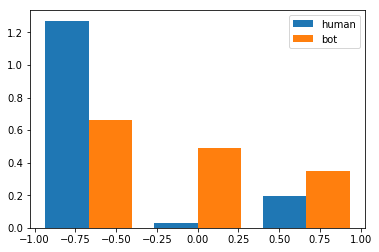

In [34]:
p = plt.hist((human_eval,bot_eval), bins=3,  normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [35]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["quality"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["quality"])
                else:
                    bot_quality.append(u["quality"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["quality"])
                else:
                    bot_eval.append(u["quality"])

In [24]:
# dataset[200]


## 5. Distribution of overall dialogue quality

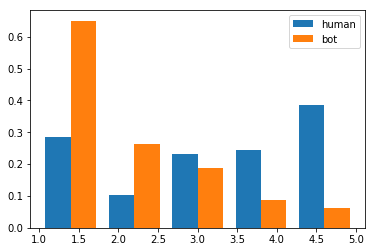

In [36]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [38]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["engagement"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["engagement"])
                else:
                    bot_quality.append(u["engagement"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["engagement"])
                else:
                    bot_eval.append(u["engagement"])

## 6. Distribution of engagement scores

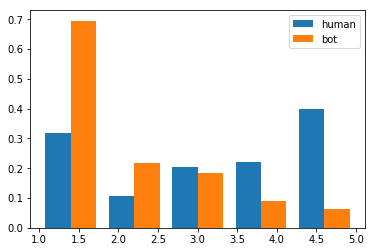

In [39]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()

In [40]:
human_quality = []
bot_quality = []
for d in dataset:
    for user in d["users"]:
        if user["id"] == "Alice":
            Alice = True if user["userType"] == "Human" else False
        elif user["id"] == "Bob":
            Bob = True if user["userType"] == "Human" else False
    for u in d["evaluation"]:
        if u["engagement"] > 0:
            if u["userId"] == "Alice":
                if Alice:
                    human_quality.append(u["breadth"])
                else:
                    bot_quality.append(u["breadth"])
            elif u["userId"] == "Bob":
                if Bob:
                    human_eval.append(u["breadth"])
                else:
                    bot_eval.append(u["breadth"])

## 7. Distribution of breadth scores

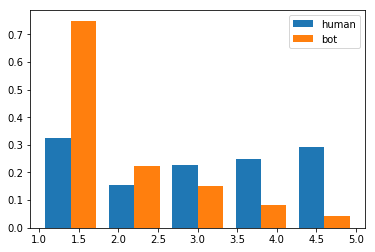

In [41]:
p = plt.hist((human_quality,bot_quality),  bins=5, normed = (1,1), label = ('human','bot'))
l = plt.legend()